In [1]:
from classifiers import get_pretrained_model, create_attributes_model

In [6]:
pretrained_conv_model, pretrained_fc, fc_dim = get_pretrained_model("vgg16")

In [7]:
resnet_conv_model, resnet_fc, resnet_fc_dim = get_pretrained_model("vgg16")

In [5]:
from preprocessing import image_loader
from torchvision import transforms
from torch import nn

In [41]:
x = image_loader(image_name="data/ClothingAttributeDataset/train/000001.jpg", transforms=None, use_gpu=None)

In [42]:
x.size()

torch.Size([1, 3, 224, 224])

In [ ]:
data_transforms = 

In [6]:
data_transforms = transforms.Compose([
    transforms.Scale(266),
    transforms.CenterCrop((400, 266)),
    transforms.ToTensor(),
#     transforms.ToPILImage(),
#     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
to_image = transforms.Compose([
    
        transforms.ToPILImage()
])

In [7]:
image_url = 'data/ClothingAttributeDataset/train/000002.jpg'

In [8]:
x = image_loader(image_name=image_url, transforms=data_transforms, use_gpu=None)

In [9]:
x.squeeze(dim=0).size()

torch.Size([3, 400, 266])

In [10]:
x.size()

torch.Size([1, 3, 400, 266])

In [91]:
y = to_image(x.squeeze(dim=0).data)

In [17]:
vgg_conv_model, _, _ = get_pretrained_model("alexnet", pop_last_pool_layer=True)
# vgg_conv_model = nn.Sequential(*list(pretrained_conv_model.children())[:-1])

In [18]:
vgg_conv_model

Sequential (
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU (inplace)
  (2): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU (inplace)
  (5): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU (inplace)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU (inplace)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU (inplace)
)

In [19]:
out_features = vgg_conv_model(x)

In [20]:
out_features.size()

torch.Size([1, 256, 24, 15])

In [196]:
class AttributeFCN(nn.Module):
    def __init__(self, in_channels, out_dims):
        super().__init__()
        model_steps = [
            nn.BatchNorm2d(in_channels),
            nn.Conv2d(in_channels, 256, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 128, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 64, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, out_dims, 1)
        ]
        self.model = nn.Sequential(*model_steps)

    def forward(self, x):
        # Get Conv Layer output.  Output channels = number of classes
        classes_conv_out = self.model(x)
        
        # Do Global Average Pooling on the Conv Layer with Number of Channels = Classes
        pool_size = (classes_conv_out.size(2), classes_conv_out.size(3))
        verage_pool = F.avg_pool2d(classes_conv_out, pool_size)
        average_pool_flatten = average_pool.view(average_pool.size(0), -1)
        classes_softmax = F.softmax(average_pool_flatten)
        
        return classes_conv_out, classes_softmax

In [197]:
model = AttributeFCN(512, 3)

In [198]:
classes_conv_out, classes_p = model(out_features)

In [199]:
import scipy.misc
import matplotlib.pyplot as plt

%matplotlib inline

In [200]:
classes_conv_out.size()

torch.Size([1, 3, 25, 16])

In [206]:
import torch

torch.max(classes_p.data, 1)

(
  0.3602
 [torch.FloatTensor of size 1x1], 
  2
 [torch.LongTensor of size 1x1])

In [201]:
classes_conv_out[0, 1].size()

torch.Size([25, 16])

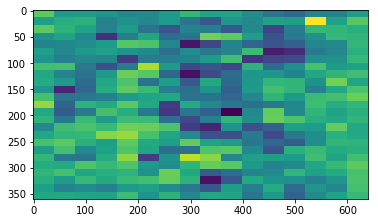

In [202]:
plt.imshow(scipy.misc.imresize(classes_conv_out[0, 2].data.numpy(), (360,640), interp='nearest'))

In [203]:
classes_conv_out.size()

torch.Size([1, 3, 25, 16])

In [204]:
import torch.nn.functional as F

In [129]:
pool_size = (outputs.size(2), outputs.size(3))

In [130]:
a

In [131]:
results

Variable containing:
 0.3070  0.3327  0.3602
[torch.FloatTensor of size 1x3]

In [107]:
outputs.size()

torch.Size([1, 3, 19, 10])

In [ ]:
def get_lrg_layers():
    return [
        BatchNormalization(axis=1, input_shape=conv_layers[-1].output_shape[1:]),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D((1,2)),
        Convolution2D(8,3,3, border_mode='same'),
        Dropout(p),
        GlobalAveragePooling2D(),
        Activation('softmax')
    ]

In [9]:
resnet_conv_model

Sequential (
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU (inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU (inplace)
  (4): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU (inplace)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU (inplace)
  (9): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU (inplace)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU (inplace)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU (inplace)
  (16): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (18): ReLU (inplace)
  (19): Conv2d(512,

In [13]:
!ls data/ClothingAttributeDataset/train/ | wc -l

    1484


In [18]:
from PIL import Image
from glob import glob
from collections import Counter
from 

In [17]:
sizes = [Image.open(filename).size for filename in glob("data/ClothingAttributeDataset/train/*.jpg")]

In [38]:
images[:5]

[((267, 400), 'data/ClothingAttributeDataset/train/000001.jpg'),
 ((500, 751), 'data/ClothingAttributeDataset/train/000002.jpg'),
 ((266, 400), 'data/ClothingAttributeDataset/train/000003.jpg'),
 ((500, 750), 'data/ClothingAttributeDataset/train/000005.jpg'),
 ((500, 751), 'data/ClothingAttributeDataset/train/000006.jpg')]

In [32]:
images = [(Image.open(filename).size, filename) for filename in glob("data/ClothingAttributeDataset/train/*.jpg")]

In [39]:
# Image.open("data/ClothingAttributeDataset/train/001619.jpg")

In [79]:
for size, filename in images:
    if size == (750, 543):
        print(filename)
        break

data/ClothingAttributeDataset/train/001619.jpg


In [26]:
[(k, 266 * for k, v in Counter(sizes).most_common(20)

[((266, 400), 434),
 ((500, 750), 254),
 ((267, 400), 215),
 ((500, 751), 184),
 ((750, 543), 68),
 ((563, 750), 48),
 ((501, 750), 17),
 ((266, 399), 15),
 ((500, 792), 13),
 ((700, 1050), 11)]

In [28]:
valid_sizes = [Image.open(filename).size for filename in glob("data/ClothingAttributeDataset/valid/*.jpg")]

In [31]:
Counter(valid_sizes).most_common(20)

[((266, 400), 104),
 ((267, 400), 69),
 ((500, 750), 54),
 ((500, 751), 43),
 ((750, 543), 22),
 ((563, 750), 12),
 ((500, 792), 8),
 ((500, 818), 4),
 ((501, 750), 3),
 ((499, 750), 3),
 ((266, 399), 2),
 ((750, 500), 2),
 ((700, 1050), 2),
 ((751, 500), 2),
 ((526, 750), 2),
 ((500, 333), 2),
 ((750, 503), 2),
 ((681, 750), 1),
 ((638, 750), 1),
 ((500, 500), 1)]